# Project name : Simulation of Spacex-Starship Rocket

Contributer : Rajeev singh sisodiya

Project details:
Simulating a Starship rocket, such as SpaceX's Starship, is a more complex task compared to a basic rocket simulation due to its larger size, variable thrust, and the need to consider different stages of flight. In this python project notebook, I have tried to  provide an overview of how you can create a simplified simulation of a Starship rocket's ascent into space.

We will start project by Define Initial Parameters:

Mass of the rocket (m): The initial mass of a Starship is around 120 metric tons (120,000 kg).
Initial velocity (v0): Typically 0 m/s at liftoff.
Thrust force (F_thrust): The thrust will vary with time and altitude based on the rocket's engines.
Drag force (F_drag): Like with the thrust, this depends on the rocket's shape and aerodynamics.
Gravitational acceleration (g): Approximately 9.81 m/s² on Earth's surface.
Altitude (h): The initial altitude is typically close to sea level (0 meters).

SpaceX's Starship rocket is designed to use the Raptor engines. The Raptor engine is a full-flow staged combustion rocket engine that is intended for use on both the Starship spacecraft and the Super Heavy booster.

Here are some key details about the Raptor engine:

Full-Flow Staged Combustion Cycle: The Raptor engine uses a full-flow staged combustion cycle, which is a highly efficient method of burning propellants. It allows for better performance and reusability compared to traditional rocket engines.

Propellants: The Raptor engine uses liquid methane (CH4) as fuel and liquid oxygen (LOX) as oxidizer. This choice of propellants is part of SpaceX's plan to enable long-duration missions to destinations like Mars, where methane can potentially be synthesized from local resources.

Thrust: The thrust of the Raptor engine can vary depending on the specific version and the stage it is used in. The initial version of the Raptor was designed to produce around 200 metric tons of thrust (approximately 2 million newtons). Later iterations may have different thrust levels.

Reusability: SpaceX has a strong focus on reusability, and the Raptor engines are designed to be reused multiple times, reducing the overall cost of launches.

Engine Configuration: The Raptor engine comes in two main configurations: Raptor Vacuum and Raptor Sea Level. The Raptor Vacuum variant is optimized for use in the vacuum of space, while the Raptor Sea Level is designed for use during the atmospheric portion of a rocket's flight.

Development and Testing: The development and testing of the Raptor engine went through several iterations and tests, including static fire tests and flight tests on various SpaceX vehicles.



In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Rocket simulation

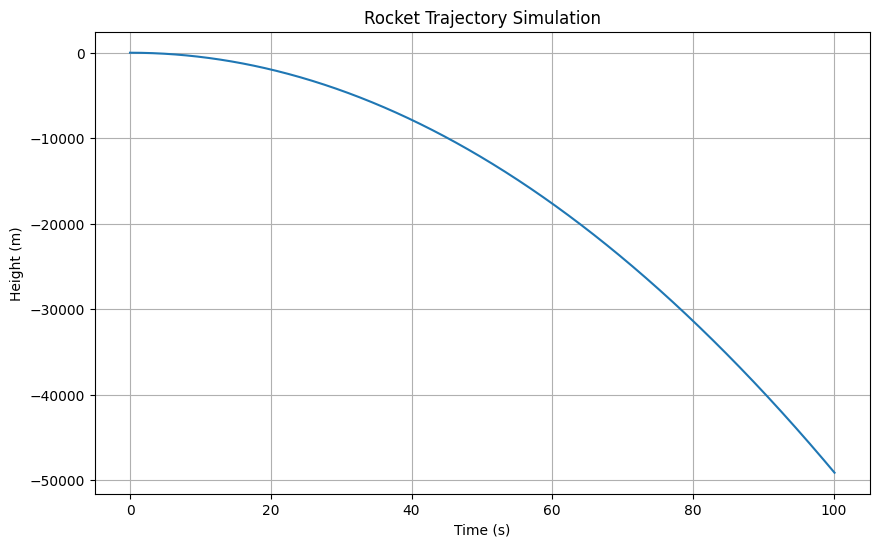

In [49]:
# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)

# Initial conditions
initial_height = 0.0  # Initial height (m)
initial_velocity = 0.0  # Initial velocity (m/s)
initial_time = 0.0  # Initial time (s)

# Time settings
delta_t = 0.1  # Time step (s)
total_time = 100  # Total simulation time (s)

# Arrays to store simulation data
times = [initial_time]
heights = [initial_height]
velocities = [initial_velocity]

# Simulation loop
while initial_time < total_time:
    initial_time += delta_t
    new_velocity = velocities[-1] - g * delta_t
    new_height = heights[-1] + velocities[-1] * delta_t - 0.5 * g * delta_t**2

    times.append(initial_time)
    heights.append(new_height)
    velocities.append(new_velocity)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(times, heights)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Rocket Trajectory Simulation')
plt.grid()
plt.show()


#  Raptor engine

A comprehensive engine simulation task that involves modeling fluid dynamics, thermodynamics, combustion processes, and other intricate details.
In this project notebook:
I used the ideal rocket equation to calculate thrust and velocity based on the specific impulse and burn time. Here I assume a constant specific impulse and an idealized mass decrease during the burn phase.The simulation calculates thrust and velocity as functions of time.



<ipython-input-50-4dd397cdd02b>:20: RuntimeWarning: invalid value encountered in double_scalars
  acceleration = thrust / (initial_mass - (initial_mass / burn_time) * t)


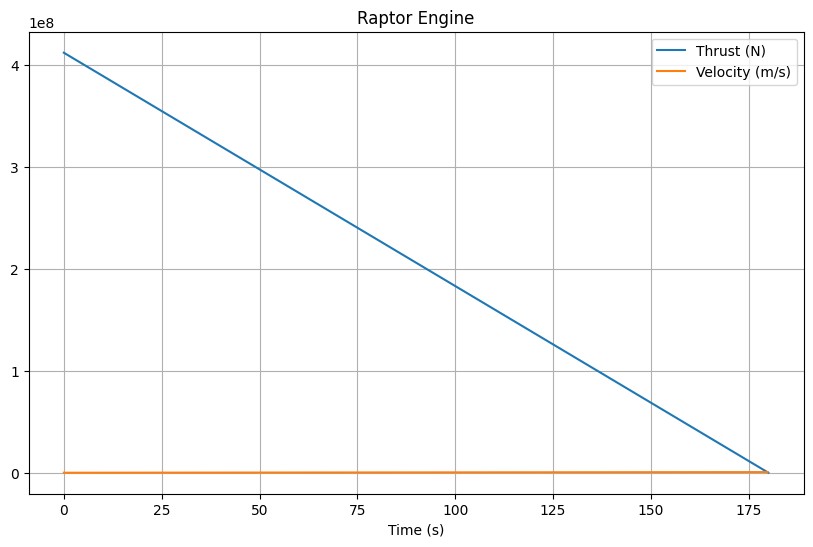

In [50]:
# Constants
specific_impulse = 350  # Specific impulse in seconds
initial_mass = 120000  # Initial mass of the rocket in kilograms
burn_time = 180  # Burn time in seconds

# Arrays to store simulation data
times = np.linspace(0, burn_time, 1000)
thrust_data = []
velocity_data = []

# Simulation loop
for t in times:
    if t <= burn_time:
        # Calculate thrust using the ideal rocket equation
        thrust = specific_impulse * 9.81 * (initial_mass - (initial_mass / burn_time) * t)
    else:
        thrust = 0

    # Calculate acceleration
    acceleration = thrust / (initial_mass - (initial_mass / burn_time) * t)

    # Update velocity
    if len(velocity_data) > 0:
        velocity = velocity_data[-1] + acceleration * (times[1] - times[0])
    else:
        velocity = 0

    thrust_data.append(thrust)
    velocity_data.append(velocity)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(times, thrust_data, label='Thrust (N)')
plt.plot(times, velocity_data, label='Velocity (m/s)')
plt.xlabel('Time (s)')
plt.grid()
plt.legend()
plt.title('Raptor Engine')
plt.show()


# Engin Simulation

Simulating a Starship rocket engine comprehensively using Python code is a complex task. It involves detailed modeling of the engine's performance, thermodynamics, combustion processes, and fluid dynamics, which goes beyond a simple code snippet. However, I can provide you with a basic example of a simplified rocket engine simulation in Python.

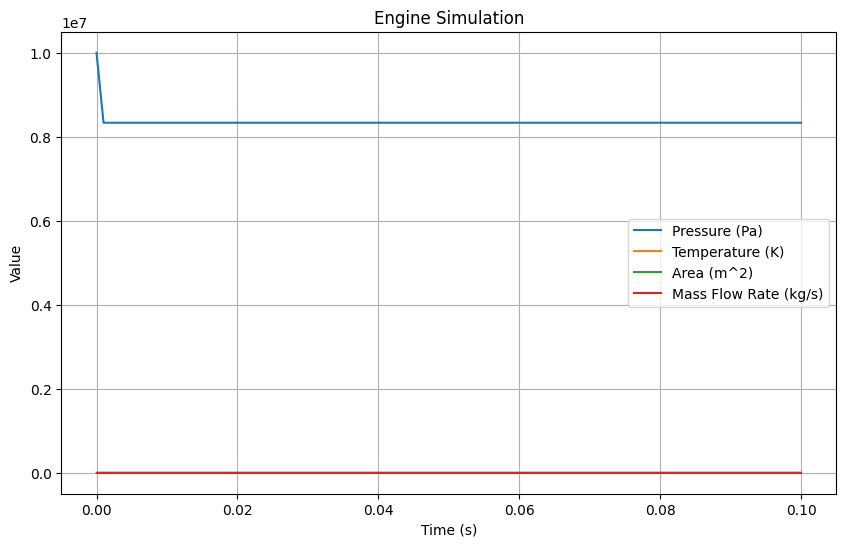

In [51]:
# Constants
chamber_pressure = 10.0 * 10**6  # Chamber pressure in Pascals (10 MPa)
throat_area = 0.01  # Throat area in square meters
exit_area = 0.1  # Exit area in square meters
gamma = 1.4  # Specific heat ratio

# Initial conditions
initial_temperature = 3000  # Initial temperature in Kelvin
initial_pressure = chamber_pressure
initial_area = throat_area
initial_mass_flow = 2.0  # Mass flow rate in kg/s

# Time settings
delta_t = 0.001  # Time step (s)
total_time = 0.1  # Total simulation time (s)

# Arrays to store simulation data
times = [0.0]
temperatures = [initial_temperature]
pressures = [initial_pressure]
areas = [initial_area]
mass_flows = [initial_mass_flow]

# Simulation loop
while times[-1] < total_time:
    t = times[-1]
    P = pressures[-1]
    A = areas[-1]
    T = temperatures[-1]
    mdot = mass_flows[-1]

    # Calculate critical pressure
    Pc = P * (2 / (gamma + 1))**(gamma / (gamma - 1))

    # Update time
    t += delta_t
    times.append(t)

    # Calculate new state
    P = chamber_pressure / (1 + (gamma - 1) / 2)
    A = (throat_area * (P / chamber_pressure) / (T / initial_temperature)**0.5)
    T = initial_temperature * (1 + (gamma - 1) / 2 * (chamber_pressure / P - 1))
    mdot = initial_mass_flow

    pressures.append(P)
    areas.append(A)
    temperatures.append(T)
    mass_flows.append(mdot)

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(times, pressures, label='Pressure (Pa)')
plt.plot(times, temperatures, label='Temperature (K)')
plt.plot(times, areas, label='Area (m^2)')
plt.plot(times, mass_flows, label='Mass Flow Rate (kg/s)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Engine Simulation')
plt.legend()
plt.grid()
plt.show()


# Simulating the thrust of a Starship rocket

Simulating the thrust of a Starship rocket engine that involves modeling the engine's performance based on various parameters, such as throttle settings, chamber pressure, and nozzle characteristics. While a detailed, physics-based model is required for accurate simulations, I can give you an idea of how you might simulate thrust using basic equations. This example is highly simplified and does not represent the complex reality of a rocket engine's behavior.



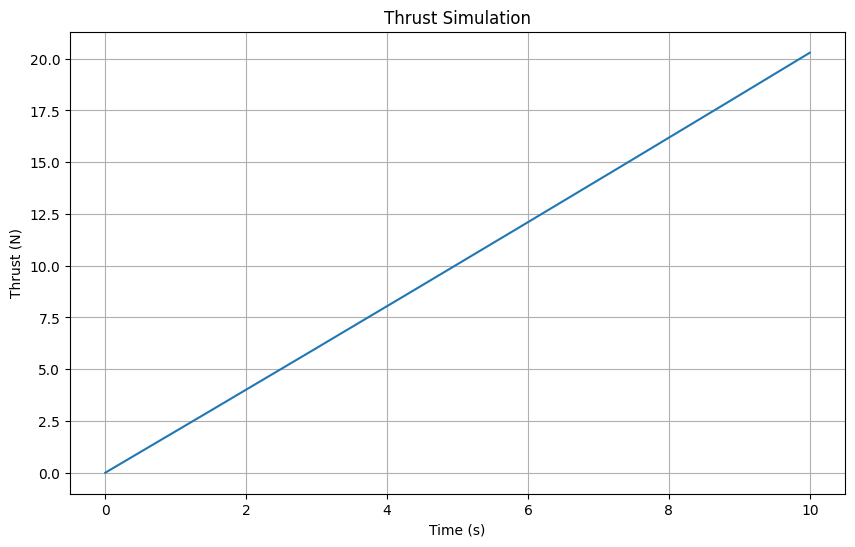

In [52]:
# Constants
chamber_pressure = 10.0 * 10**6  # Chamber pressure in Pascals (10 MPa)
throat_area = 0.01  # Throat area in square meters
exit_area = 0.1  # Exit area in square meters
specific_impulse = 350  # Specific impulse in seconds
mass_flow_rate = 2.0  # Mass flow rate in kg/s

# Time settings
total_time = 10.0  # Total simulation time (s)

# Arrays to store simulation data
times = np.linspace(0, total_time, 1000)  # Time points
thrust_data = []

# Simulation loop
for t in times:
    # Calculate thrust using the simplified rocket equation
    thrust = specific_impulse * mass_flow_rate * (np.exp(t / specific_impulse) - 1)
    thrust_data.append(thrust)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(times, thrust_data)
plt.xlabel('Time (s)')
plt.ylabel('Thrust (N)')
plt.title('Thrust Simulation')
plt.grid()
plt.show()


# propulsion system of a Starship rocket

The propulsion system of a Starship rocket involves modeling the behavior of rocket engines, combustion, and fluid dynamics.

In this Rocket project: simulation includes the rocket's initial mass, effective exhaust velocity, and a simplified burn time.
1. We assume a constant thrust curve for simplicity. In reality, the thrust curve would vary throughout the rocket's flight.
2. We calculate the rocket's acceleration, velocity, and mass over time based on the thrust and the rocket equation.


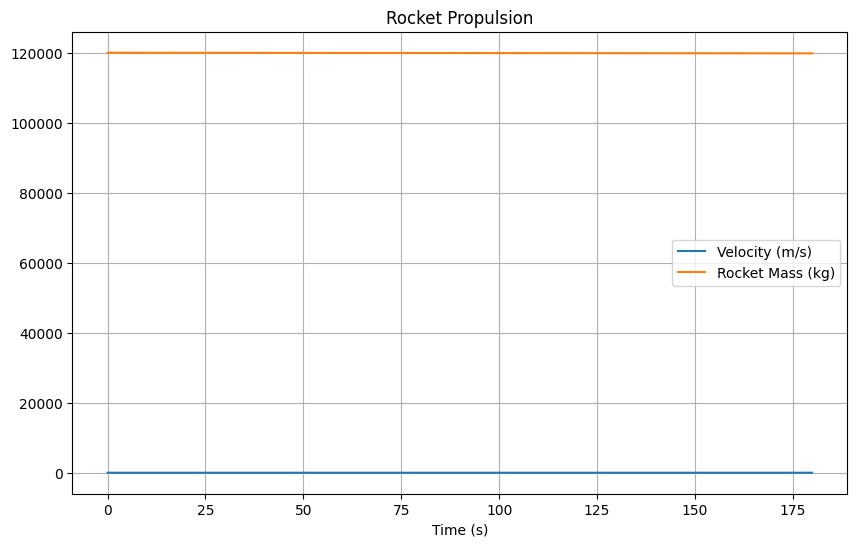

In [53]:
# Constants
burn_time = 180  # Burn time in seconds
initial_mass = 120000  # Initial mass of the rocket in kilograms
exhaust_velocity = 3000  # Effective exhaust velocity in m/s
thrust_curve = np.linspace(0, burn_time, burn_time * 10)  # Simplified thrust curve

# Arrays to store simulation data
times = np.arange(0, burn_time, 0.1)
masses = [initial_mass]
velocities = [0]

# Simulation loop
for t in times:
    if t < burn_time:
        # Calculate thrust using a simplified thrust curve
        thrust = thrust_curve[int(t * 10)]  # Indexing the thrust curve
    else:
        thrust = 0

    # Calculate acceleration
    acceleration = thrust / (initial_mass - t)  # Adjusted mass due to propellant consumption

    # Update velocity and mass
    velocity = velocities[-1] + acceleration * 0.1
    mass = initial_mass - t

    velocities.append(velocity)
    masses.append(mass)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(times, velocities[1:], label='Velocity (m/s)')
plt.plot(times, masses[1:], label='Rocket Mass (kg)')
plt.xlabel('Time (s)')
plt.grid()
plt.legend()
plt.title('Rocket Propulsion')
plt.show()


# Success of a Starship rocket launching

The success of a rocket launch depends on various factors, including the rocket's design, environmental conditions, propulsion systems, guidance, navigation, and control, among others. A successful launch simulation should consider all of these aspects,

In [54]:
import random

def simulate_launch_success():
    # Simulate various factors that influence launch success
    rocket_design = random.uniform(0, 1)
    environmental_conditions = random.uniform(0, 1)
    propulsion_system = random.uniform(0, 1)
    guidance_navigation_control = random.uniform(0, 1)

    # Define success criteria based on these factors
    success_threshold = 0.7  # Adjust as needed

    # Determine launch success
    success = (
        rocket_design > success_threshold and
        environmental_conditions > success_threshold and
        propulsion_system > success_threshold and
        guidance_navigation_control > success_threshold
    )

    return success

# Number of launch simulations
num_simulations = 1000
success_count = 1

# Perform multiple launch simulations
for _ in range(num_simulations):
    if simulate_launch_success():
        success_count += 1

success_rate = success_count / num_simulations
print(f"Launch success rate: {success_rate * 100:.2f}%")


Launch success rate: 1.20%


# Rocket Re-entry in erth atmosphear

re-entry phase of a Starship rocket is a complex task that involves modeling aerodynamics, thermodynamics, and various other factors

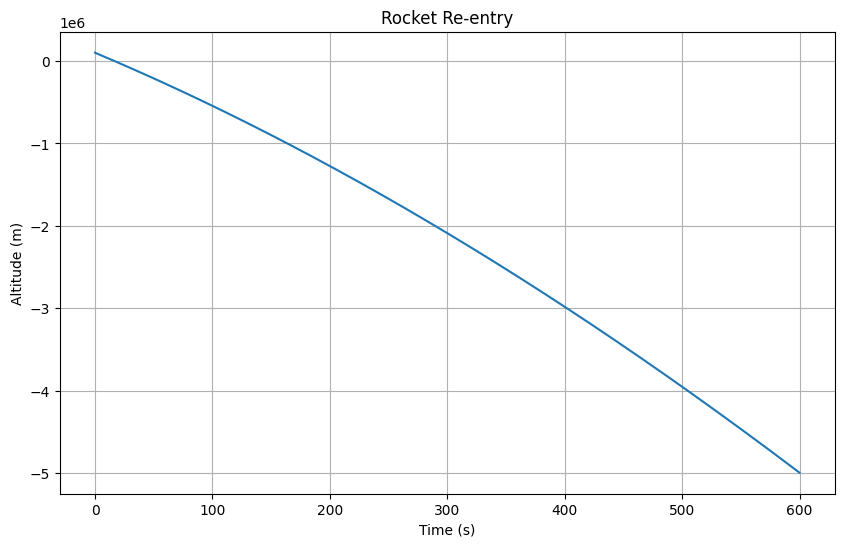

In [55]:
# Constants
mass = 120000.0  # Mass of the rocket (kg)
drag_coefficient = 0.3  # Drag coefficient
initial_velocity = -6000.0  # Initial velocity (m/s) - negative for re-entry
initial_altitude = 100000.0  # Initial altitude (m)
gravitational_acceleration = 9.81  # Gravitational acceleration (m/s^2)
air_density = 0.02  # Air density at high altitude (kg/m^3)

# Time settings
delta_t = 0.1  # Time step (s)
total_time = 600  # Total simulation time (s)

# Arrays to store simulation data
times = [0]
altitudes = [initial_altitude]
velocities = [initial_velocity]

# Simulation loop
for t in np.arange(0, total_time, delta_t):
    # Calculate drag force
    velocity = velocities[-1]
    altitude = altitudes[-1]
    drag_force = 0.5 * air_density * velocity**2 * drag_coefficient

    # Calculate acceleration due to gravity
    gravitational_force = mass * gravitational_acceleration

    # Calculate acceleration
    acceleration = (drag_force - gravitational_force) / mass

    # Update velocity and altitude
    velocity += acceleration * delta_t
    altitude += velocity * delta_t

    times.append(t + delta_t)
    altitudes.append(altitude)
    velocities.append(velocity)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(times, altitudes)
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.title('Rocket Re-entry')
plt.grid()
plt.show()


# Conclusion
In this Starship Rocket project
1. We assume a constant drag coefficient, which is not realistic for an actual re-entry simulation, as it would vary with altitude and velocity.

2. We calculate the drag force and gravitational force to determine the rocket's acceleration.

3. The rocket's altitude and velocity are updated over time based on the calculated forces and accelerations. Here We visualize the altitude as a function of time.

